**Experiment with logit**

Trying out different evaluation metrics. The summary is that logistic regression seems to hit about 0.6 accuracy all the time, and different parameterizations seem to permute the predictions randomly. Basically it's just guessing at random.

In [32]:
import cv2
import numpy as np
import pandas as pd
import os
import glob
import re
import pickle
from matplotlib import pyplot as plt
from sklearn import datasets, neighbors, linear_model, model_selection, svm
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, KFold, learning_curve, LeavePOut, GridSearchCV

# import private libraries
import sys
sys.path.append("..")
import src.utils as utils

In [33]:
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000, penalty='l2')

In [34]:
train_data = pickle.load(open( "train_data_binary_threshold.pkl", "rb"))
test_data = pickle.load(open( "test_data_binary_threshold.pkl", "rb"))

In [5]:
y = train_data["y"]
X = train_data.drop('y', axis=1)
X.shape

(49, 2)

In [6]:
lpo = LeavePOut(2)

In [7]:
logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
xval_scores = model_selection.cross_val_score(logistic, X, y, cv=lpo, scoring='accuracy')

In [11]:
xval_scores_kfold = model_selection.cross_validate(logistic, X, y, cv=4, return_estimator=True)

In [9]:
xval_scores.mean()

0.5697278911564626

In [10]:
test_data_y = test_data['y']

In [11]:
test_data_x = test_data.drop('y', axis=1)

In [12]:
logistic.score(test_data_x, test_data_y )

0.42857142857142855

In [78]:
xval_scores_kfold['estimator']

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='warn',
           n_jobs=None, penalty='l2', rand

In [79]:
for estimator in xval_scores_kfold['estimator']:
    print(test_data_y == estimator.predict(test_data_x))

2       True
32     False
24     False
24b    False
6       True
7       True
41      True
Name: y, dtype: bool
2      False
32      True
24      True
24b     True
6      False
7      False
41     False
Name: y, dtype: bool
2      False
32      True
24      True
24b     True
6      False
7      False
41     False
Name: y, dtype: bool
2      False
32      True
24      True
24b     True
6      False
7      False
41     False
Name: y, dtype: bool


In [13]:
X

hist0  hist255
1    -93288.0  -5016.0
1    -95190.0  -3114.0
1     -1902.0   1902.0
1      -299.0    299.0
1     40911.0    561.0
1    -12727.0    -49.0
10     -424.0    424.0
10    40262.0   1210.0
10    41055.0    417.0
10    40326.0   1146.0
10     -360.0    360.0
10    -1153.0   1153.0
10     -729.0    729.0
10     -729.0    729.0
10       64.0    -64.0
11   107193.0 -25273.0
12    -2144.0   2144.0
12     3730.0  -3730.0
12    -3306.0   3306.0
12      424.0   -424.0
16     3211.0  -3211.0
18     1677.0  -1677.0
19    -6974.0  -2242.0
26    29320.0  12152.0
26b    -682.0    682.0
30     2312.0  -2312.0
30b    2222.0  -2222.0
31     1301.0  -1301.0
31b    4156.0  -4156.0
33     2001.0  -2001.0
35    25646.0 -25646.0
35     7470.0  17911.0
35    41527.0    -55.0
35   -18176.0  43557.0
35    15881.0  25591.0
38    11497.0 -11497.0
4       380.0   -380.0
42    -7305.0   7305.0
45    -3411.0   3411.0
4b      716.0   -716.0
7b     -318.0    318.0
8      1468.0  -1468.0
8      3103.0  -3103.0
8     -1635.0   1635.0
8     -9197.0   9197.0
8b    46013.0 -46013.0
9     -2326.0   2326.0
9      2138.0   2470.0
9     -4464.0   -144.0

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
logistic.score(X_test, y_test)

0.4666666666666667

In [17]:
# benchmark against dumb heuristics using DummyClassifier
dummy = DummyClassifier() # default: respect training set distribution
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.4666666666666667

In [18]:
metrics.f1_score(y_test, dummy.predict(X_test), pos_label='I')

0.4

In [19]:
metrics.f1_score(y_test, logistic.predict(X_test), pos_label='I')

0.6363636363636365

In [20]:
positive_probabilities = logistic.predict_proba(X_test)[:, 0]
dummy_probabilities = dummy.predict_proba(X_test)[:, 0]

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, positive_probabilities, pos_label='I')
dummy_fpr, dummy_tpr, dummy_thresholds = metrics.roc_curve(y_test, dummy_probabilities, pos_label='I')

print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.66666667 0.66666667 1.
 1.        ]
[0.         0.08333333 0.16666667 0.16666667 0.25       0.25
 1.        ]
[1.60586713 0.60586713 0.60577517 0.60203205 0.56265049 0.55870118
 0.48808204]


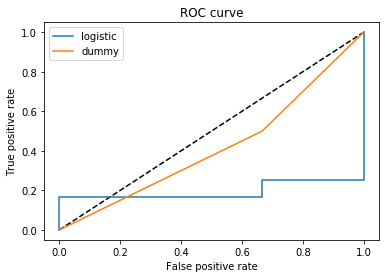

In [22]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='logistic')
plt.plot(dummy_fpr, dummy_tpr, label='dummy')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Tuning hyper-parameter

Best parameters set found on development set:

{'C': 0.1}

Grid scores on development set:

0.559 (+/-0.088) for {'C': 0.1}
0.559 (+/-0.088) for {'C': 1}
0.559 (+/-0.088) for {'C': 10}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



/Users/zachwener/miniconda3/envs/cs229-project/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/zachwener/miniconda3/envs/cs229-project/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


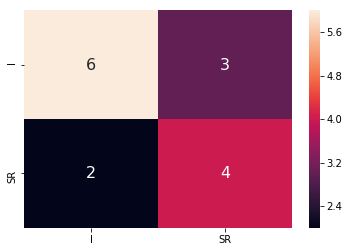

ROC AUC score
0.6296296296296297


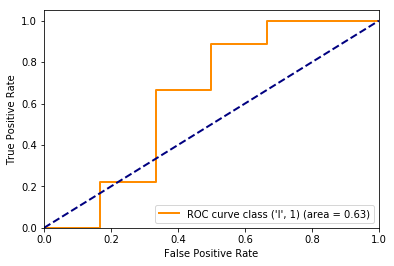


This is the classification report for the eval set:
              precision    recall  f1-score   support

           I       0.75      0.67      0.71         9
          SR       0.57      0.67      0.62         6

   micro avg       0.67      0.67      0.67        15
   macro avg       0.66      0.67      0.66        15
weighted avg       0.68      0.67      0.67        15

This is the classification report for the training set:
              precision    recall  f1-score   support

           I       0.69      0.55      0.61        20
          SR       0.50      0.64      0.56        14

   micro avg       0.59      0.59      0.59        34
   macro avg       0.59      0.60      0.59        34
weighted avg       0.61      0.59      0.59        34



In [88]:
logistic_grid_search = GridSearchCV(logistic, param_grid={'C': [0.1, 1, 10]})
utils.do_CV(X, y, logistic_grid_search, multi_class=False)

In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Load kernels with path data and print incorrect predictions**

In [3]:
train_data_with_path = pickle.load(open( "train_data_binary_with_path.pkl", "rb"))
test_data_with_path = pickle.load(open( "test_data_binary_with_path.pkl", "rb"))

In [4]:
before_path = train_data_with_path['before_path']

In [5]:
after_path = train_data_with_path['after_path']

In [6]:
y = train_data_with_path['y']
train_data_with_path = train_data_with_path.drop('y', axis=1)
x_train, x_test, y_train, y_test = train_test_split(train_data_with_path, y, test_size=0.3, random_state=0)

In [7]:
# drop the path data from the training set so we don't train on it
x_train = x_train.drop('before_path', axis=1).drop('after_path', axis=1)
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Model predicted incorrectly. True label is I
Before: legs_folder/35/9-4-14.tif


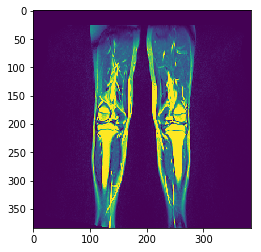

After: legs_folder/35/10-15-15.tif


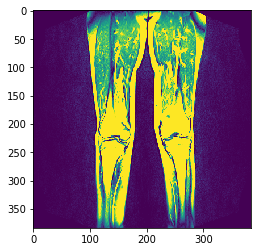

Model predicted incorrectly. True label is I
Before: legs_folder/35/9-4-14.tif


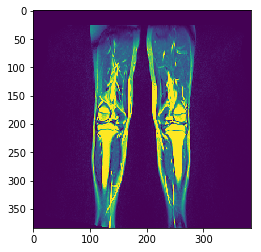

After: legs_folder/35/12-28-17.tif


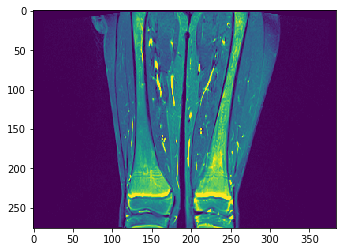

Model predicted incorrectly. True label is I
Before: legs_folder/42/8-9-11.tif


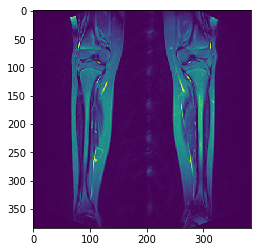

After: legs_folder/42/5-8-12.tif


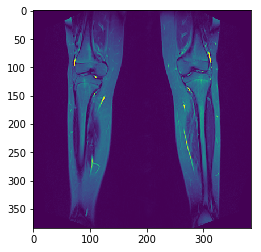

Model predicted incorrectly. True label is SR
Before: legs_folder/35/10-15-15.tif


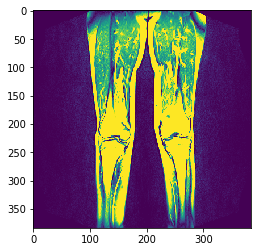

After: legs_folder/35/12-28-17.tif


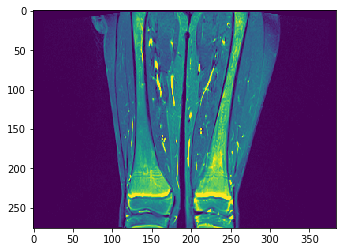

Model predicted incorrectly. True label is I
Before: legs_folder/7b/4-10-12.tif


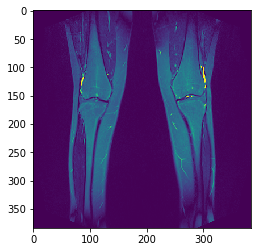

After: legs_folder/7b/5-28-15.tif


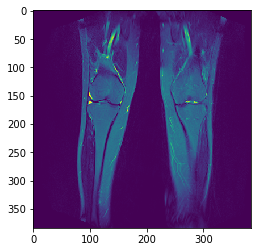

Model predicted incorrectly. True label is I
Before: legs_folder/35/9-4-14.tif


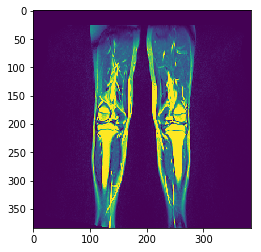

After: legs_folder/35/12-30-16.tif


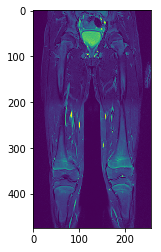

Model predicted incorrectly. True label is SR
Before: legs_folder/35/10-15-15.tif


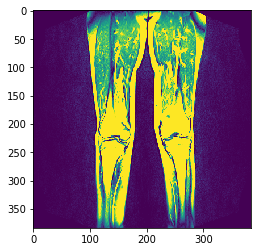

After: legs_folder/35/12-30-16.tif


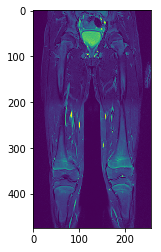

Model predicted incorrectly. True label is I
Before: legs_folder/31/12-10-13.tif


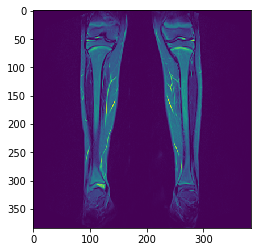

After: legs_folder/31/9-15-16.tif


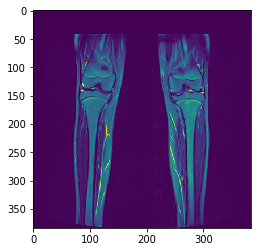

In [8]:
utils.show_incorrect_images(logistic, x_test, y_test)